<a href="https://colab.research.google.com/github/ranamerp/machine-learning-practice/blob/master/Shopify-Intern-Challenge/intern_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np


In [2]:
#df = pd.read_csv("dataset.csv")
df = pd.read_csv("/content/drive/My Drive/dataset.csv")

The goal is to calculate average order value. This could be defined by the average volume of orders. First, we want to look at the average volume for each shop, and see if we can identify any trends. 


In [10]:
dfs = []
df = df.sort_values(by = ["created_at"], ascending=True)

for index, i in df.groupby('shop_id'):
    dfs.append(i)

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25


<BarContainer object of 100 artists>

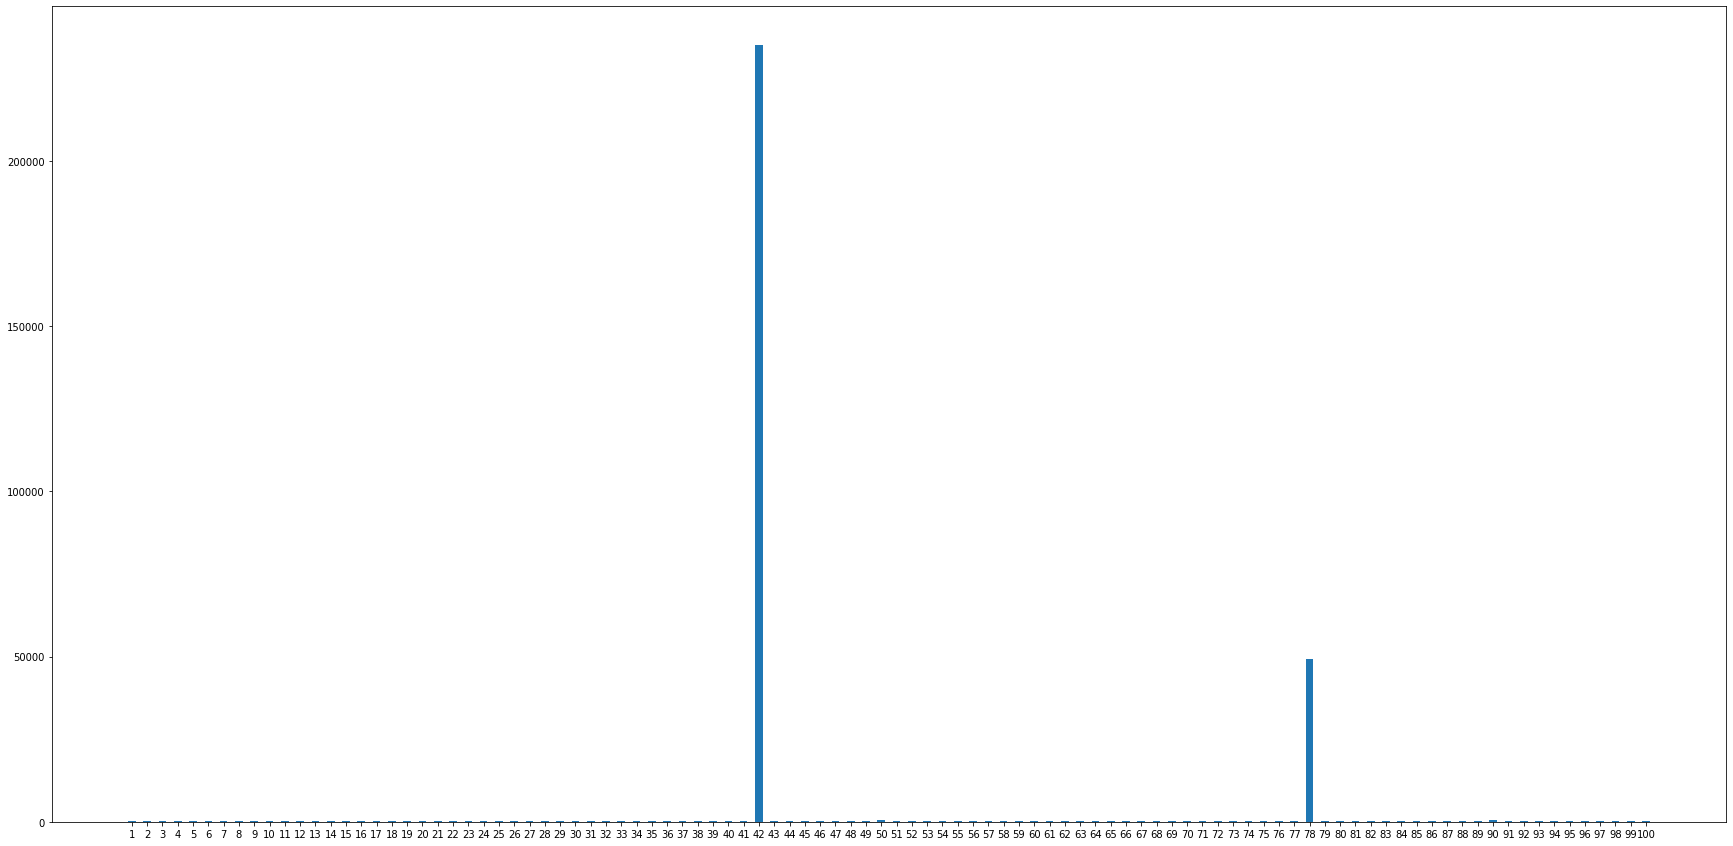

In [4]:
import matplotlib.pyplot as plt

means = []
for i in dfs:
    mean = i["order_amount"].mean()
    shopid = i["shop_id"].mean()
    means.append([shopid,mean])

means = pd.DataFrame(means)
fig = plt.figure(figsize = (30,15))


x_ticks = np.arange(1, 100, 1)
plt.xticks(x_ticks)

plt.bar(means[0], means[1], width= 0.5)

Clearly, there are a few outliers here, which are having a large impact on the AOV. Let's take a look at some of those and see what the issues are. 

In [9]:

print("Max: ")
print(dfs[41]["order_amount"].max())
print(dfs[41]["total_items"].max())
print("")
print("Min: ")
print(dfs[41]["order_amount"].min())
print(dfs[41]["total_items"].min())
print("")
print("")

print("Max: ")
print(dfs[77]["order_amount"].max())
print(dfs[77]["total_items"].max())
print("")
print("Min: ")
print(dfs[77]["order_amount"].min())
print(dfs[77]["total_items"].min())


Max: 
704000
2000

Min: 
352
1


Max: 
154350
6

Min: 
25725
1


As we can see, the maxes and mins of these certain shops are extreme outliers. Shop 78 is selling a single sneaker for $25K, and shop 42 manages to sell 2000 sneakers at once. Assuming this data is correct, then we can look at a new way of determining average order value. One way we could try to solve this is to calculate average number of orders. This will allow us to gauge number of sneakers bought across all the shops. 

Average Shoes Bought: 8.652863083878737


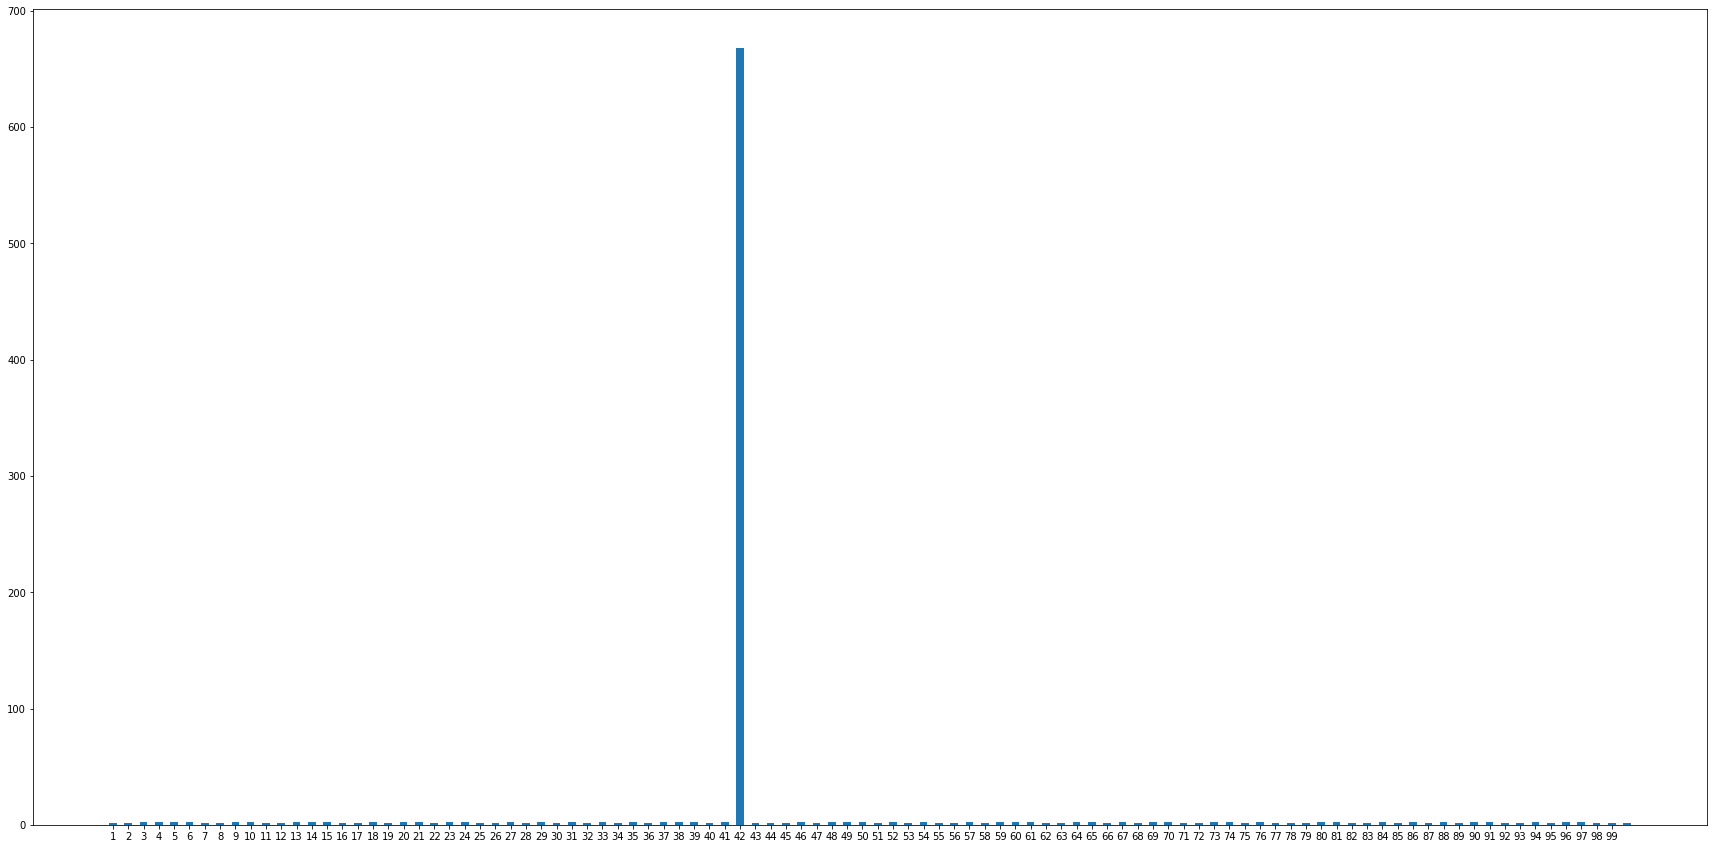

In [17]:
items = []
for i in dfs:
    mean = i["total_items"].mean()
    shopid = i["shop_id"].mean()
    items.append([shopid,mean])

means = pd.DataFrame(items)
fig = plt.figure(figsize = (30,15))


x_ticks = np.arange(1, 100, 1)
plt.xticks(x_ticks)

plt.bar(means[0], means[1], width= 0.5)

average = means[1].mean()
print("Average Shoes Bought:" , average)

Here we can see that shop 42 is still an outlier, but the average amount of shoes bought in a 30 day period is much more reasonable.

# a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

We found that the primary issue with this dataset was that the price values were so heavily skewed in certain shops that the AOV was skewed. We recognized that there was a chance that this data was accurate, so that made us think about other ways to quantify this data. 

# b) What metric would you report for this dataset?
The method that we decided was to gauge average amount of item bought. 

# c) What is its value?
8.652863083878737

